In [1]:
"""Calcular información mutua de las características y las salidas del mapeo"""
"""sklearn usa unidades nats para la entropía y la información mutua"""

'sklearn usa unidades nats para la entropía y la información mutua'

In [2]:
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import config_dodo
import config
from utilities import read_pickle, write_pickle
from sklearn.metrics import adjusted_mutual_info_score, mutual_info_score
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

(config_dodo.FIG_PATH / "Mutual Information").mkdir(parents=True, exist_ok=True)
sns.set_context("paper", font_scale=2.0)
sns.set_style(
    "ticks",
    {
        "text.color": "k",
        "axes.edgecolor": "k",
        "axes.labelcolor": "k",
        "xtick.color": "k",
        "ytick.color": "k",
    },
)

In [3]:
long_data = read_pickle(config_dodo.LAB_PATH / "label_long_data.pickle")
seq_data_stp = read_pickle(config_dodo.LAB_PATH / "label_sequence_data_stp.pickle")
seq_data_wav = read_pickle(config_dodo.LAB_PATH / "label_sequence_data_wav.pickle")
stp_sample = read_pickle(config_dodo.STP_PATH / "stp_sample.pickle")
scaler_stp_sample = read_pickle(config_dodo.STP_PATH / "scaler_stp_sample.pickle")
wav_sample = read_pickle(config_dodo.WAV_PATH / "wav_sample.pickle")
pca_wav_sample = read_pickle(config_dodo.WAV_PATH / "pca_wav_sample.pickle")

In [4]:
sample_idx_stp = []
sample_idx_wav = []
lat_sum = 0
for key in config_dodo.KEY_LIST:
    name = config_dodo.SUBJECT_NAME.format(*key)
    pickle_end = name + ".pickle"
    idx = read_pickle(config_dodo.IDX_PATH / f"idx_{pickle_end}")
    sample_idx_stp.append(idx + lat_sum)
    sample_idx_wav.append(idx[::config.EMB_WAV_SUBSAMPLE_EVERY] + lat_sum)
    lat = read_pickle(config_dodo.MTR_PATH / f"Latency/latency_{pickle_end}")
    lat_sum += lat
sample_idx_stp = np.concatenate(sample_idx_stp)
sample_idx_wav = np.concatenate(sample_idx_wav)
sample_stp_in_wav = np.isin(sample_idx_stp, sample_idx_wav, assume_unique=True)

In [5]:
mean_wav_sample = np.column_stack([wav_sample[:, i: i + 10].mean(axis=1) for i in range(0, wav_sample.shape[1], 10)])

In [6]:
orden = {
    0: "mu_y1",
    2: "mu_y2",
    4: "mu_amp",
    6: "mu_dy_max",
    8: "mu_abs_delta_phi",
    10: "mu_freq",
    1: "sigma_y1",
    3: "sigma_y2",
    5: "sigma_amp",
    7: "sigma_dy_max",
    9: "sigma_abs_delta_phi",
    11: "sigma_freq",
    12: "event_y1",
    13: "event_y2",
    14: "event_amp",
    15: "event_dy_max",
    16: "event_abs_delta_phi",
    17: "event_freq",
    22: "x_other_nose",
    21: "x_other_back",
    23: "x_center_of_mass",
    20: "x_other_tail",
    18: "x_paws_diff",
    19: "x_paws_mean",
    28: "y_other_nose",
    27: "y_other_back",
    29: "y_center_of_mass",
    26: "y_other_tail",
    24: "y_paws_diff",
    25: "y_paws_mean",
}
stp_feats = [
    "Altura mínima",
    "Altura máxima",
    "Amplitud",
    "Velocidad",
    "Desfasaje",
    "Frecuencia",
]
stp_markers = [
    "Nariz",
    "Espalda",
    "Base de la cola",
    "Centro de masa",
    "Diferencia patas",
    "Promedio patas",
]
stp_nombres = [
    r"Promedio $\hat{\mu}_\xi$",
    r"Desviación $\hat{\sigma}_\xi$",
    r"Evento $\xi$",
    r"Coordenada $x$",
    r"Coordenada $y$",
]
ang_nombres = [
    "Nariz",
    "Nariz",
    "Espalda",
    "Espalda",
    "Cola",
    "Patas traseras",
    "Pata derecha",
    "Pata derecha",
    "Pata izquierda",
    "Pata izquierda",
]
cmap = "inferno"

In [7]:
"""Adjusted mutual info score de los labels wavelets y pasos y poses. Series temporales"""
"""https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html#sklearn.metrics.adjusted_mutual_info_score"""
# ami_series = adjusted_mutual_info_score(long_data["label_stp"], long_data["label_wav"])
ami_series = read_pickle(config_dodo.INF_PATH / "ami_series.pickle")
print(f"{ami_series:.2f}")
# write_pickle(ami_series, config_dodo.INF_PATH / "ami_series.pickle")

0.22


In [8]:
"""Adjusted mutual info score de los labels wavelets y pasos y poses. Secuencias"""
# ami_sequences = adjusted_mutual_info_score(
#     seq_data_stp["label_stp"],
#     long_data.iloc[seq_data_stp["global_idx"]]["label_wav"]
# )
ami_sequences = read_pickle(config_dodo.INF_PATH / "ami_sequences.pickle")
print(f"{ami_sequences:.2f}")
# write_pickle(ami_sequences, config_dodo.INF_PATH / "ami_sequences.pickle")

0.11


In [9]:
"""Información mutua entre características y labels"""
# mi_labels_scaler_stp = mutual_info_classif(X=scaler_stp_sample, y=long_data.iloc[sample_idx_stp]["label_stp"])
mi_labels_scaler_stp = read_pickle(config_dodo.INF_PATH / "mi_labels_scaler_stp.pickle")
print(mi_labels_scaler_stp)
# write_pickle(mi_labels_scaler_stp, config_dodo.INF_PATH / "mi_labels_scaler_stp.pickle")

[0.58774588 0.29611849 0.44431703 0.46148304 0.49647241 0.40713589
 0.45841687 0.32902368 0.29950925 0.12271071 0.42565312 0.30881082
 1.54420988 1.51436146 1.50532765 1.4964885  1.07529651 0.42460689
 0.22920578 0.14579459 0.12217673 0.06321279 0.14575038 0.14452793
 0.07690504 0.10202377 0.11863218 0.2643361  0.21131883 0.42666289]


In [10]:
"""Información mutua entre características y labels"""
# mi_contra_labels_scaler_stp = mutual_info_classif(X=scaler_stp_sample, y=long_data.iloc[sample_idx_stp]["label_wav"])
mi_contra_labels_scaler_stp = read_pickle(config_dodo.INF_PATH / "mi_contra_labels_scaler_stp.pickle")
print(mi_contra_labels_scaler_stp)
# write_pickle(mi_contra_labels_scaler_stp, config_dodo.INF_PATH / "mi_contra_labels_scaler_stp.pickle")

[0.40874722 0.19237147 0.25305041 0.33846046 0.38869011 0.29083035
 0.34417088 0.22324261 0.21200652 0.10822213 0.37101428 0.23383688
 1.69086834 1.66627926 1.68161822 1.67503062 1.19658168 0.42678179
 0.12310985 0.06598647 0.05225163 0.0198484  0.0711542  0.08938897
 0.0531689  0.06013828 0.1089655  0.17138779 0.17749105 0.26282837]


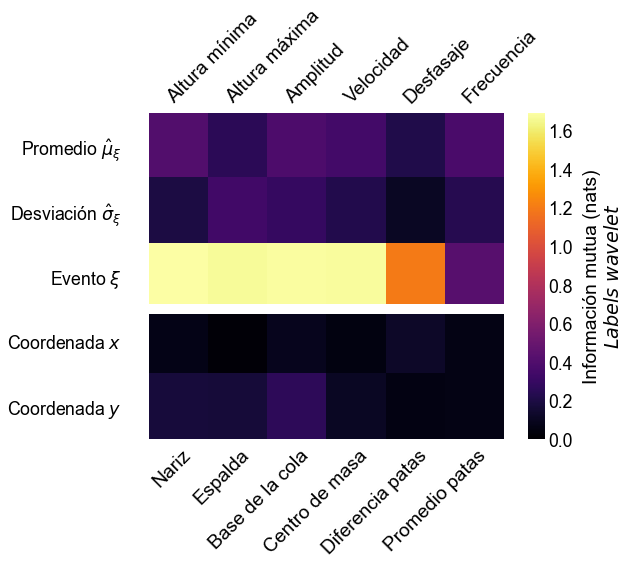

In [11]:
plt.figure(figsize=(8.5, 6))
vmax = mi_contra_labels_scaler_stp.max()
plt.imshow(mi_contra_labels_scaler_stp[list(orden.keys())].reshape(5, 6), aspect="auto", cmap=cmap, vmin=0, vmax=vmax)
cax = plt.colorbar(pad=0.0)
cax.set_label(label="Información mutua (nats)\n" + r"$Labels$ $wavelet$", labelpad=10)
cax.ax.set_frame_on(False)
cax.ax.tick_params(axis="both", which="both", length=0)
plt.hlines(y=2.5, xmin=-0.6, xmax=5.6, color="white", lw=10)
plt.gca().set_yticks(range(5))
plt.gca().set_yticklabels(stp_nombres)
for i, feature in enumerate(stp_feats):
    plt.text(i - 0.25, -0.6, feature, va="bottom", ha="left", rotation=45)
for i, marker in enumerate(stp_markers):
    plt.text(i + 0.25, 4.6, marker, va="top", ha="right", rotation=45)
plt.gca().set_xticks([])
plt.gca().set_frame_on(False)
plt.gca().tick_params(axis="both", which="both", length=0)
plt.savefig(config_dodo.FIG_PATH / "Mutual Information" / "mi_contra_labels_scaler_stp.pdf", bbox_inches="tight", dpi=600)
plt.savefig(config_dodo.FIG_PATH / "Mutual Information" / "mi_contra_labels_scaler_stp.png", bbox_inches="tight", dpi=600)
plt.show()
plt.close()

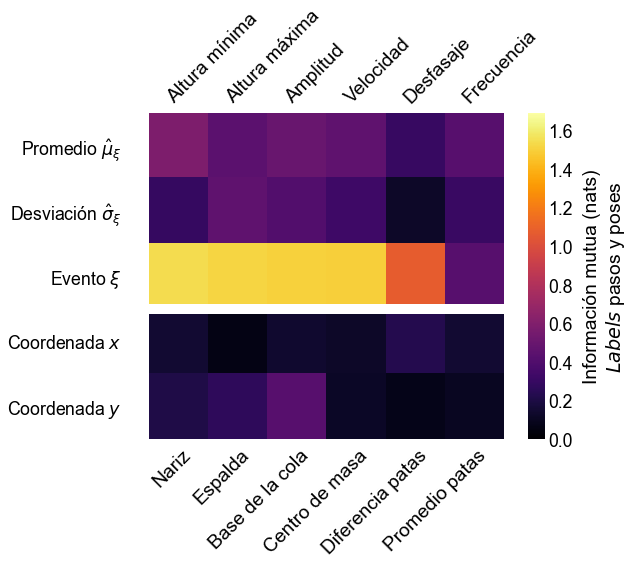

In [12]:
plt.figure(figsize=(8.5, 6))
plt.imshow(mi_labels_scaler_stp[list(orden.keys())].reshape(5, 6), aspect="auto", cmap=cmap, vmin=0, vmax=vmax)
cax = plt.colorbar(pad=0.0)
cax.set_label(label="Información mutua (nats)\n" + r"$Labels$ pasos y poses", labelpad=10)
cax.ax.set_frame_on(False)
cax.ax.tick_params(axis="both", which="both", length=0)
plt.hlines(y=2.5, xmin=-0.6, xmax=5.6, color="white", lw=10)
plt.gca().set_yticks(range(5))
plt.gca().set_yticklabels(stp_nombres)
for i, feature in enumerate(stp_feats):
    plt.text(i - 0.25, -0.6, feature, va="bottom", ha="left", rotation=45)
for i, marker in enumerate(stp_markers):
    plt.text(i + 0.25, 4.6, marker, va="top", ha="right", rotation=45)
plt.gca().set_xticks([])
plt.gca().set_frame_on(False)
plt.gca().tick_params(axis="both", which="both", length=0)
plt.savefig(config_dodo.FIG_PATH / "Mutual Information" / "mi_labels_scaler_stp.pdf", bbox_inches="tight", dpi=600)
plt.savefig(config_dodo.FIG_PATH / "Mutual Information" / "mi_labels_scaler_stp.png", bbox_inches="tight", dpi=600)
plt.show()
plt.close()

In [13]:
"""Información mutua entre características y labels"""
# mi_labels_pca_wav = mutual_info_classif(X=pca_wav_sample, y=long_data.iloc[sample_idx_wav]["label_wav"])
mi_labels_pca_wav = read_pickle(config_dodo.INF_PATH / "mi_labels_pca_wav.pickle")
print(mi_labels_pca_wav)
# write_pickle(mi_labels_pca_wav, config_dodo.INF_PATH / "mi_labels_pca_wav.pickle")

[0.66861905 0.60288371 0.41970527 0.41917487 0.34568505 0.2408852
 0.18242429 0.09538466 0.20366004 0.14277272 0.12564773 0.17885214
 0.20443413 0.10084828 0.10539236 0.11082106 0.12652081 0.14503368
 0.10282459 0.09213329 0.07951617 0.10621705 0.09391504 0.08120853
 0.09490436 0.10342883 0.10431728 0.12466457 0.09711778 0.10707182
 0.12910311 0.10300234 0.1102384  0.08928929 0.08909023 0.12622685
 0.1015758  0.11045186 0.12597059 0.11302677 0.1657118  0.11493737
 0.09814486 0.1468567  0.10559273 0.11708937 0.10425253 0.10960953
 0.10698346 0.11488926]


In [14]:
"""Información mutua entre características y labels"""
# mi_contra_labels_pca_wav = mutual_info_classif(X=pca_wav_sample, y=long_data.iloc[sample_idx_wav]["label_stp"])
mi_contra_labels_pca_wav = read_pickle(config_dodo.INF_PATH / "mi_contra_labels_pca_wav.pickle")
print(mi_contra_labels_pca_wav)
# write_pickle(mi_contra_labels_pca_wav, config_dodo.INF_PATH / "mi_contra_labels_pca_wav.pickle")

[0.36140817 0.3553137  0.12719058 0.2313566  0.10180306 0.15614165
 0.09139351 0.05805222 0.07874838 0.07500952 0.06900436 0.11973051
 0.06586715 0.05781935 0.05469357 0.07526908 0.07630358 0.07671075
 0.06817664 0.0746393  0.0616877  0.06826228 0.0746417  0.05495229
 0.05345815 0.06107478 0.0733955  0.07544256 0.04955857 0.04779712
 0.05650991 0.0606722  0.0805679  0.05164797 0.04605375 0.06529898
 0.04493038 0.06025817 0.06577987 0.06168458 0.07262056 0.06715986
 0.04711143 0.07975245 0.05037097 0.05492751 0.05143095 0.05631022
 0.0714449  0.065733  ]


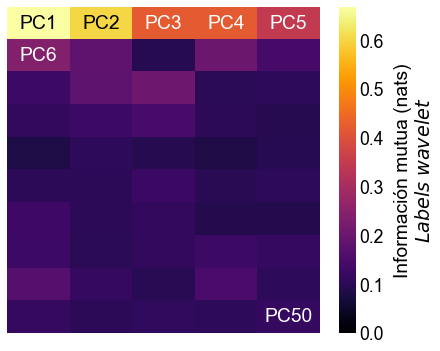

In [15]:
plt.figure(figsize=(7, 6))
vmax = mi_labels_pca_wav.max()
plt.imshow(mi_labels_pca_wav.reshape(10, 5), aspect="auto", cmap=cmap, vmin=0, vmax=vmax)
cax = plt.colorbar()
cax.set_label(label="Información mutua (nats)\n" + r"$Labels$ $wavelet$", labelpad=10)
cax.ax.set_frame_on(False)
cax.ax.tick_params(axis="both", which="both", length=0)
plt.gca().set_frame_on(False)
colors = defaultdict(lambda: "white")
colors.update({i: "k" for i in range(2)})
for i in range(6):
    plt.text(i - i//5 * 5, i//5, f"PC{i+1}", va="center", ha="center", c=colors[i])
plt.text(4, 9, f"PC50", va="center", ha="center", c="white")
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.savefig(config_dodo.FIG_PATH / "Mutual Information" / "mi_labels_pca.pdf", bbox_inches="tight", dpi=600)
plt.savefig(config_dodo.FIG_PATH / "Mutual Information" / "mi_labels_pca.png", bbox_inches="tight", dpi=600)
plt.show()
plt.close()

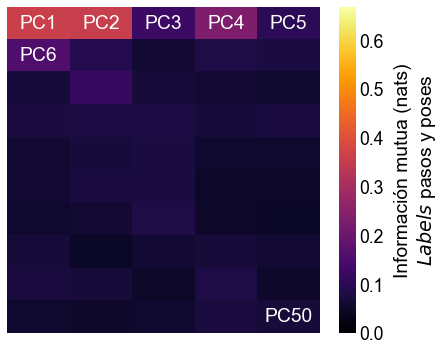

In [16]:
plt.figure(figsize=(7, 6))
plt.imshow(mi_contra_labels_pca_wav.reshape(10, 5), aspect="auto", cmap=cmap, vmin=0, vmax=vmax)
cax = plt.colorbar()
cax.set_label(label="Información mutua (nats)\n" + r"$Labels$ pasos y poses", labelpad=10)
cax.ax.set_frame_on(False)
cax.ax.tick_params(axis="both", which="both", length=0)
plt.gca().set_frame_on(False)
for i in range(6):
    plt.text(i - i//5 * 5, i//5, f"PC{i+1}", va="center", ha="center", c="white")
plt.text(4, 9, f"PC50", va="center", ha="center", c="white")
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.savefig(config_dodo.FIG_PATH / "Mutual Information" / "mi_contra_labels_pca.pdf", bbox_inches="tight", dpi=600)
plt.savefig(config_dodo.FIG_PATH / "Mutual Information" / "mi_contra_labels_pca.png", bbox_inches="tight", dpi=600)
plt.show()
plt.close()

In [17]:
"""Información mutua entre características y labels"""
# mi_labels_wav = mutual_info_classif(X=wav_sample, y=long_data.iloc[sample_idx_wav]["label_wav"])
mi_labels_wav = read_pickle(config_dodo.INF_PATH / "mi_labels_wav.pickle")
print(mi_labels_wav)
# write_pickle(mi_labels_wav, config_dodo.INF_PATH / "mi_labels_wav.pickle")

[0.24258243 0.25186759 0.26209372 0.25335601 0.26101199 0.27257346
 0.27403542 0.270698   0.26639647 0.28262317 0.29490801 0.29444313
 0.29454699 0.28260925 0.27313315 0.27838767 0.27425058 0.26471372
 0.24725924 0.23754048 0.21345756 0.20304024 0.18380778 0.16748464
 0.1611579  0.15529012 0.15845027 0.15450529 0.16055393 0.17868831
 0.20004551 0.20944149 0.20386718 0.19807656 0.19076486 0.18954173
 0.18933545 0.18544854 0.18369114 0.18237773 0.18474661 0.18753136
 0.18221079 0.17658462 0.17316669 0.16587815 0.16029717 0.15573493
 0.1463334  0.13852509 0.24215603 0.24196938 0.25439429 0.25007112
 0.25685579 0.25825707 0.27008278 0.26560422 0.26150234 0.27718315
 0.28426978 0.28953214 0.28258425 0.27694814 0.2751458  0.27462515
 0.27322843 0.26298473 0.24030907 0.22696011 0.21068572 0.19319873
 0.17667075 0.16896387 0.16441727 0.16121009 0.16912517 0.16919979
 0.1723006  0.18453711 0.20790434 0.22405152 0.22022548 0.21440054
 0.20975586 0.20387317 0.19872412 0.19840221 0.19794508 0.1994

In [18]:
"""Información mutua entre características y labels"""
# mi_contra_labels_wav = mutual_info_classif(X=wav_sample, y=long_data.iloc[sample_idx_wav]["label_stp"])
mi_contra_labels_wav = read_pickle(config_dodo.INF_PATH / "mi_contra_labels_wav.pickle")
print(mi_contra_labels_wav)
# write_pickle(mi_contra_labels_wav, config_dodo.INF_PATH / "mi_contra_labels_wav.pickle")

[0.12800302 0.13434141 0.13457091 0.13243259 0.13117583 0.13289988
 0.13356268 0.13573295 0.1333351  0.13058688 0.13548071 0.13679436
 0.13548016 0.14117059 0.14051219 0.14597643 0.14772359 0.14777969
 0.1429166  0.14247908 0.13557896 0.12957379 0.12341041 0.12274664
 0.11717181 0.11210502 0.11323958 0.10946106 0.10633003 0.11431292
 0.11712976 0.12736359 0.14343844 0.15716879 0.16591744 0.1687559
 0.1622242  0.16264689 0.15963388 0.15807627 0.16129596 0.16759738
 0.16676016 0.16345016 0.16237945 0.15885377 0.16014047 0.15192478
 0.14538766 0.14000025 0.12905362 0.13003937 0.13245802 0.13086734
 0.13241654 0.13433244 0.14249938 0.13963224 0.13562076 0.13267794
 0.13419479 0.14019693 0.13743727 0.14588244 0.15123998 0.15318689
 0.16005523 0.15667989 0.15236499 0.15064292 0.14766302 0.14422645
 0.13879593 0.13922631 0.13830045 0.12977401 0.1332478  0.13247811
 0.12711617 0.13101859 0.13409327 0.14462751 0.15154287 0.16787989
 0.1807766  0.18248849 0.18270183 0.18251031 0.18218064 0.18739

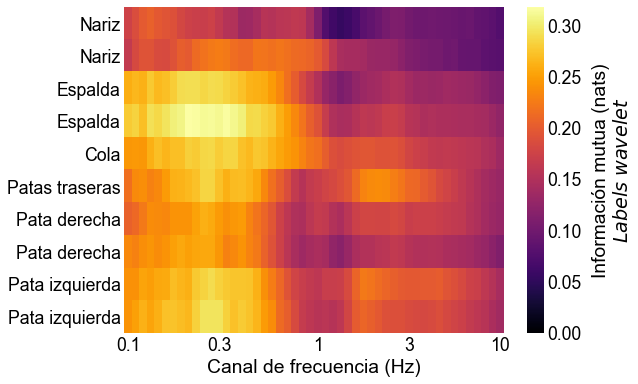

In [19]:
plt.figure(figsize=(8.5, 6))
vmax = mi_labels_wav.max()
plt.imshow(mi_labels_wav.reshape(10, 50)[::-1], aspect="auto", cmap=cmap, vmin=0, vmax=vmax)
cax = plt.colorbar()
cax.set_label(label="Información mutua (nats)\n" + r"$Labels$ $wavelet$", labelpad=10)
cax.ax.set_frame_on(False)
cax.ax.tick_params(axis="both", which="both", length=0)
plt.gca().set_yticks(range(10))
plt.gca().set_yticklabels(ang_nombres)
plt.xlabel("Canal de frecuencia (Hz)")
plt.gca().set_xticks([0, 12, 25, 37, 49])
plt.gca().set_xticklabels([0.1, 0.3, 1, 3, 10])
plt.gca().set_frame_on(False)
plt.gca().tick_params(axis="both", which="both", length=0)
plt.savefig(config_dodo.FIG_PATH / "Mutual Information" / "mi_labels_wav.pdf", bbox_inches="tight", dpi=600)
plt.savefig(config_dodo.FIG_PATH / "Mutual Information" / "mi_labels_wav.png", bbox_inches="tight", dpi=600)
plt.show()
plt.close()

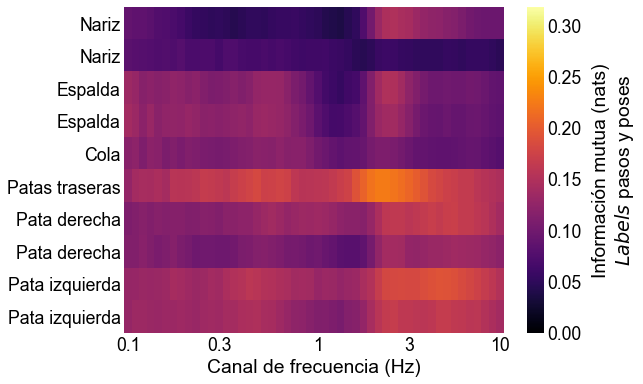

In [20]:
plt.figure(figsize=(8.5, 6))
plt.imshow(mi_contra_labels_wav.reshape(10, 50)[::-1], aspect="auto", cmap=cmap, vmin=0, vmax=vmax)
cax = plt.colorbar()
cax.set_label(label="Información mutua (nats)\n" + r"$Labels$ pasos y poses", labelpad=10)
cax.ax.set_frame_on(False)
cax.ax.tick_params(axis="both", which="both", length=0)
plt.gca().set_yticks(range(10))
plt.gca().set_yticklabels(ang_nombres)
plt.xlabel("Canal de frecuencia (Hz)")
plt.gca().set_xticks([0, 12, 25, 37, 49])
plt.gca().set_xticklabels([0.1, 0.3, 1, 3, 10])
plt.gca().set_frame_on(False)
plt.gca().tick_params(axis="both", which="both", length=0)
plt.savefig(config_dodo.FIG_PATH / "Mutual Information" / "mi_contra_labels_wav.pdf", bbox_inches="tight", dpi=600)
plt.savefig(config_dodo.FIG_PATH / "Mutual Information" / "mi_contra_labels_wav.png", bbox_inches="tight", dpi=600)
plt.show()
plt.close()

In [21]:
"""Información mutua entre características y labels"""
# mi_labels_mean_wav = mutual_info_classif(X=mean_wav_sample, y=long_data.iloc[sample_idx_wav]["label_wav"])
mi_labels_mean_wav = read_pickle(config_dodo.INF_PATH / "mi_labels_mean_wav.pickle")
print(mi_labels_mean_wav)
# write_pickle(mi_labels_mean_wav, config_dodo.INF_PATH / "mi_labels_mean_wav.pickle")

[0.40868789 0.42525135 0.32587922 0.37982487 0.24462973 0.41266324
 0.42424751 0.34901362 0.39343364 0.24943534 0.38452731 0.39101503
 0.29126978 0.32938417 0.20706932 0.38321165 0.39147183 0.31743171
 0.35742292 0.21968132 0.40755514 0.44339846 0.37674977 0.39603709
 0.2665888  0.38968112 0.41035253 0.30737738 0.26463298 0.20447256
 0.42614362 0.44920747 0.30366172 0.26038291 0.19064938 0.39979201
 0.41978715 0.26211767 0.24457807 0.19151607 0.30548638 0.33193645
 0.25982386 0.18650384 0.13773683 0.34735143 0.30801094 0.21607704
 0.17924826 0.1487094 ]


In [22]:
"""Información mutua entre características"""
"""https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression"""
"""https://en.wikipedia.org/wiki/Mutual_information"""
m_scaler_stp = scaler_stp_sample.shape[1]
# mi_scaler_stp = np.zeros((m_scaler_stp, m_scaler_stp))
# for i in range(m_scaler_stp - 1):
#     for j in range(i + 1, m_scaler_stp):
#         print(i, j)
#         mi_scaler_stp[i, j] = mutual_info_regression(X=scaler_stp_sample[:, i: i + 1], y=scaler_stp_sample[:, j])
#         mi_scaler_stp[j, i] = mi_scaler_stp[i, j]
# for i in range(m_scaler_stp):
#     mi_scaler_stp[i, i] = mutual_info_regression(X=scaler_stp_sample[:, i: i + 1], y=scaler_stp_sample[:, i])
mi_scaler_stp = read_pickle(config_dodo.INF_PATH / "mi_scaler_stp.pickle")
# write_pickle(mi_scaler_stp, config_dodo.INF_PATH / "mi_scaler_stp.pickle")

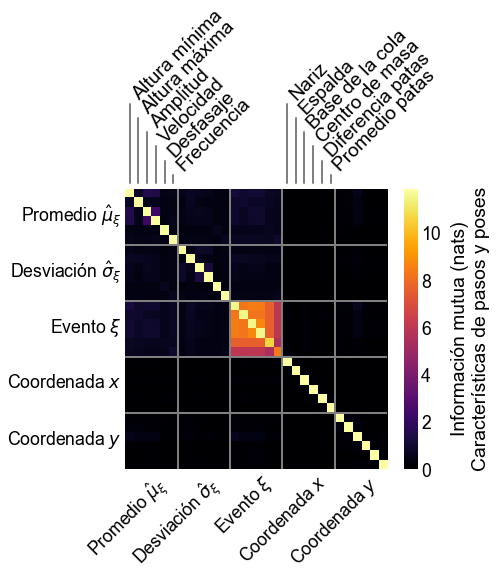

In [23]:
left, width_im = 0.0, 0.65
bottom, height_im = 0.0, 0.65
width_annot, height_annot = 0.52, 0.2
spacing = 0.005

rect_im = [left, bottom, width_im, height_im]
rect_annot = [left, bottom + height_im + spacing, width_annot, height_annot]

fig = plt.figure(figsize=(7, 6))

ax_im = fig.add_axes(rect_im, frameon=False)
ax_annot = fig.add_axes(rect_annot, frameon=False)

norm_dist = mi_scaler_stp[list(orden.keys()), :]
norm_dist = norm_dist[:, list(orden.keys())]
vmax = norm_dist.max()
im = ax_im.imshow(norm_dist, aspect="auto", cmap=cmap, vmin=0, vmax=vmax)
cax = plt.colorbar(im, ax=ax_im)
cax.set_label(label="Información mutua (nats)\nCaracterísticas de pasos y poses", labelpad=10)
cax.ax.set_frame_on(False)
cax.ax.tick_params(axis="both", which="both", length=0)
ax_im.set_xticks(np.arange(5, 30, 6))
ax_im.set_xticklabels(stp_nombres, rotation=45, ha="right")
ax_im.set_yticks(np.arange(2, 30, 6))
ax_im.set_yticklabels(stp_nombres)
ax_im.vlines(6 * np.arange(1, 5) - 0.5, -0.5, 29.5, colors="0.5", lw=2)
ax_im.hlines(6 * np.arange(1, 5) - 0.5, *ax_im.get_xlim(), colors="0.5", lw=2)
ax_im.tick_params(axis="both", which="both", length=0)
for i, feature in enumerate(stp_feats):
    max_stem = 10
    factor_stem = 1.8
    ax_annot.plot([i, i], [0, max_stem - factor_stem * i], "0.5", lw=2)
    ax_annot.text(i, max_stem - factor_stem * i, feature, va="bottom", ha="left", rotation=45)
for i, marker in enumerate(stp_markers):
    max_stem = 10
    factor_stem = 1.8
    ax_annot.plot([18 + i, 18 + i], [0, max_stem - factor_stem * i], "0.5", lw=2)
    ax_annot.text(18 + i, max_stem - factor_stem * i, marker, va="bottom", ha="left", rotation=45)
ax_annot.set_xlim(*ax_im.get_xlim())
ax_annot.set_xticks([])
ax_annot.set_yticks([])
plt.savefig(config_dodo.FIG_PATH / "Mutual Information" / "mi_scaler_stp.pdf", bbox_inches="tight", dpi=600)
plt.savefig(config_dodo.FIG_PATH / "Mutual Information" / "mi_scaler_stp.png", bbox_inches="tight", dpi=600)
plt.show()
plt.close()

In [24]:
m_mean_wav = mean_wav_sample.shape[1]
# mi_mean_wav = np.zeros((m_mean_wav, m_mean_wav))
# for i in range(m_mean_wav - 1):
#     for j in range(i + 1, m_mean_wav):
#         print(i, j)
#         mi_mean_wav[i, j] = mutual_info_regression(X=mean_wav_sample[:, i: i + 1], y=mean_wav_sample[:, j])
#         mi_mean_wav[j, i] = mi_mean_wav[i, j]
# for i in range(m_mean_wav):
#     mi_mean_wav[i, i] = mutual_info_regression(X=mean_wav_sample[:, i: i + 1], y=mean_wav_sample[:, i])
mi_mean_wav = read_pickle(config_dodo.INF_PATH / "mi_mean_wav.pickle")
# write_pickle(mi_mean_wav, config_dodo.INF_PATH / "mi_mean_wav.pickle")

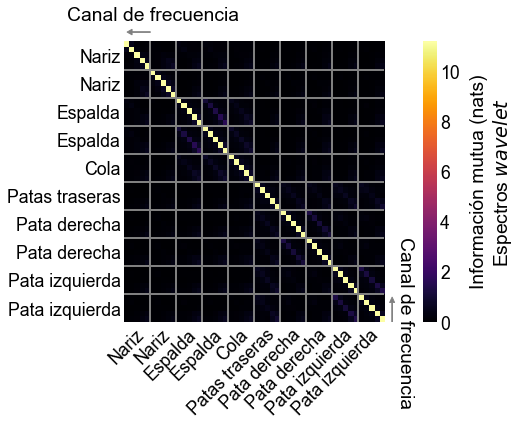

In [25]:
left, width_im = 0.0, 0.65
bottom, height_im = 0.0, 0.65
width_annot, height_annot = 0.52, 0.05
spacing = 0.005

rect_im = [left, bottom, width_im, height_im]
rect_annot = [left, bottom + height_im + spacing, width_annot, height_annot]

fig = plt.figure(figsize=(7.5, 6))

ax_im = fig.add_axes(rect_im, frameon=False)
ax_annot = fig.add_axes(rect_annot, frameon=False)

# sum_ent = mi_mean_wav.diagonal()[:, np.newaxis] + mi_mean_wav.diagonal()[np.newaxis, :]
# norm_dist = (sum_ent - 2 * mi_mean_wav) / (sum_ent - mi_mean_wav)
norm_dist = mi_mean_wav[::-1]
norm_dist = norm_dist[:, ::-1]
vmax = mi_mean_wav.max()
im = ax_im.imshow(norm_dist, aspect="auto", cmap=cmap, vmin=0, vmax=vmax)
cax = plt.colorbar(im, ax=ax_im)
cax.set_label(label="Información mutua (nats)\n" + r"Espectros $wavelet$", labelpad=10)
cax.ax.set_frame_on(False)
cax.ax.tick_params(axis="both", which="both", length=0)
ax_im.set_xticks(np.arange(4, 50, 5))
ax_im.set_xticklabels(ang_nombres, rotation=45, ha="right")
ax_im.set_yticks(np.arange(2, 50, 5))
ax_im.set_yticklabels(ang_nombres)
ax_im.vlines(5 * np.arange(1, 10) - 0.5, -0.5, 49.5, colors="0.5", lw=2)
ax_im.hlines(5 * np.arange(1, 10) - 0.5, *ax_im.get_xlim(), colors="0.5", lw=2)
ax_im.arrow(51, 49.5, 0, -3.5, color="0.5", width=0.006 * 25, head_width=0.04 * 25, head_length=1)
ax_im.text(52.5 + 1, 49.5, "Canal de frecuencia", va="center", ha="center", rotation=-90)
ax_im.set_xlim(-0.5, 53.5)
ax_im.tick_params(axis="both", which="both", length=0)
ax_annot.arrow(4.5, 0, -3.5, 0, color="0.5", width=0.006, head_width=0.04, head_length=1)
ax_annot.text(5, 0.05, "Canal de frecuencia", va="bottom", ha="center")
ax_annot.set_ylim(-0.05, 0.1)
ax_annot.set_xlim(*ax_im.get_xlim())
ax_annot.set_xticks([])
ax_annot.set_yticks([])
plt.savefig(config_dodo.FIG_PATH / "Mutual Information" / "mi_mean_wav.pdf", bbox_inches="tight", dpi=600)
plt.savefig(config_dodo.FIG_PATH / "Mutual Information" / "mi_mean_wav.png", bbox_inches="tight", dpi=600)
plt.show()
plt.close()

In [26]:
m_pca_wav = pca_wav_sample.shape[1]
# mi_pca_wav = np.zeros((m_pca_wav, m_pca_wav))
# for i in range(m_pca_wav - 1):
#     for j in range(i + 1, m_pca_wav):
#         print(i, j)
#         mi_pca_wav[i, j] = mutual_info_regression(X=pca_wav_sample[:, i: i + 1], y=pca_wav_sample[:, j])
#         mi_pca_wav[j, i] = mi_pca_wav[i, j]
# for i in range(m_pca_wav):
#     mi_pca_wav[i, i] = mutual_info_regression(X=pca_wav_sample[:, i: i + 1], y=pca_wav_sample[:, i])
mi_pca_wav = read_pickle(config_dodo.INF_PATH / "mi_pca_wav.pickle")
# write_pickle(mi_pca_wav, config_dodo.INF_PATH / "mi_pca_wav.pickle")

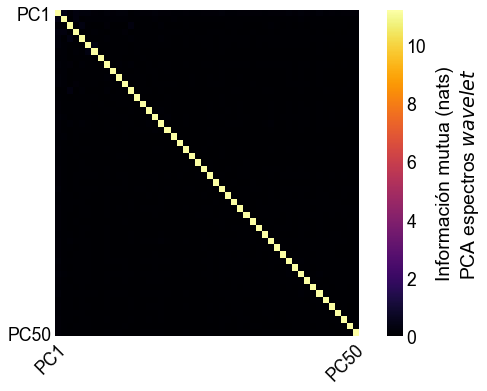

In [27]:
plt.figure(figsize=(7, 6))
# sum_ent = mi_pca_wav.diagonal()[:, np.newaxis] + mi_pca_wav.diagonal()[np.newaxis, :]
# norm_dist = (sum_ent - 2 * mi_pca_wav) / (sum_ent - mi_pca_wav)
vmax = mi_pca_wav.max()
plt.imshow(mi_pca_wav, aspect="auto", cmap=cmap, vmin=0, vmax=vmax)
ax = plt.gca()
cax = plt.colorbar()
cax.set_label(label="Información mutua (nats)\n" + r"PCA espectros $wavelet$", labelpad=10)
cax.ax.set_frame_on(False)
cax.ax.tick_params(axis="both", which="both", length=0)
pca_nombres = [
    "PC1",
    "PC50",
]
ax.set_xticks([2, 51])
ax.set_xticklabels(pca_nombres, rotation=45, ha="right")
ax.set_yticks([0, 49])
ax.set_yticklabels(pca_nombres)
ax.set_frame_on(False)
ax.tick_params(axis="both", which="both", length=0)
plt.savefig(config_dodo.FIG_PATH / "Mutual Information" / "mi_pca_wav.pdf", bbox_inches="tight", dpi=600)
plt.savefig(config_dodo.FIG_PATH / "Mutual Information" / "mi_pca_wav.png", bbox_inches="tight", dpi=600)
plt.show()
plt.close()

In [28]:
"""Información mutua características cruzadas"""
# mi_mean_wav_scaler_stp = np.zeros((m_mean_wav, m_scaler_stp))
# for i in range(m_mean_wav):
#     for j in range(m_scaler_stp):
#         print(i, j)
#         mi_mean_wav_scaler_stp[i, j] = mutual_info_regression(
#             X=mean_wav_sample[:, i: i + 1], y=scaler_stp_sample[sample_stp_in_wav][:, j]
#         )
# write_pickle(mi_mean_wav_scaler_stp, config_dodo.INF_PATH / "mi_mean_wav_scaler_stp.pickle")
mi_mean_wav_scaler_stp = read_pickle(config_dodo.INF_PATH / "mi_mean_wav_scaler_stp.pickle")

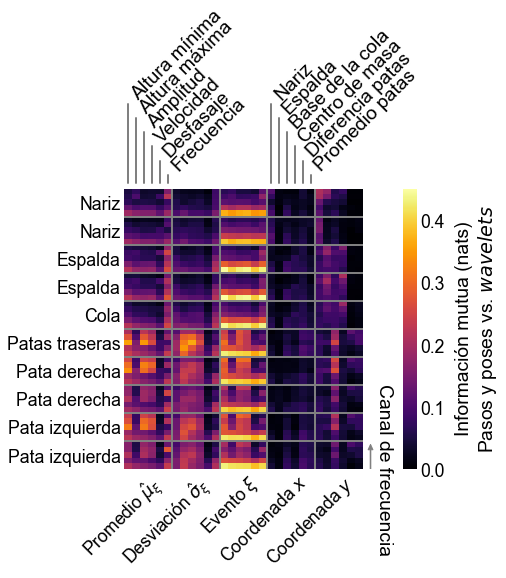

In [29]:
left, width_im = 0.0, 0.65
bottom, height_im = 0.0, 0.65
width_annot, height_annot = 0.52, 0.2
spacing = 0.005

rect_im = [left, bottom, width_im, height_im]
rect_annot = [left, bottom + height_im + spacing, width_annot, height_annot]

fig = plt.figure(figsize=(7, 6))

ax_im = fig.add_axes(rect_im, frameon=False)
ax_annot = fig.add_axes(rect_annot, frameon=False)

vmax = mi_mean_wav_scaler_stp.max()
im = ax_im.imshow(mi_mean_wav_scaler_stp[::-1, list(orden.keys())], aspect="auto", cmap=cmap, vmin=0, vmax=vmax)
cax = plt.colorbar(im, ax=ax_im)
cax.set_label(label="Información mutua (nats)\n" + r"Pasos y poses vs. $wavelets$", labelpad=10)
cax.ax.set_frame_on(False)
cax.ax.tick_params(axis="both", which="both", length=0)
ax_im.set_xticks(np.arange(5, 30, 6))
ax_im.set_xticklabels(stp_nombres, rotation=45, ha="right")
ax_im.set_yticks(np.arange(2, 50, 5))
ax_im.set_yticklabels(ang_nombres)
ax_im.vlines(6 * np.arange(1, 5) - 0.5, *ax_im.get_ylim(), colors="0.5", lw=2)
ax_im.hlines(5 * np.arange(1, 10) - 0.5, *ax_im.get_xlim(), colors="0.5", lw=2)
ax_im.arrow(30.5, 49.5, 0, -3.5, color="0.5", width=0.006 * 16, head_width=0.04 * 16, head_length=1)
ax_im.text(31.25 + 1, 49.5, "Canal de frecuencia", va="center", ha="center", rotation=-90)
ax_im.set_xlim(-0.5, 32.5)
ax_im.set_frame_on(False)
ax_im.tick_params(axis="both", which="both", length=0)
for i, feature in enumerate(stp_feats):
    max_stem = 10
    factor_stem = 1.8
    ax_annot.plot([i, i], [0, max_stem - factor_stem * i], "0.5", lw=2)
    ax_annot.text(i, max_stem - factor_stem * i, feature, va="bottom", ha="left", rotation=45)
for i, marker in enumerate(stp_markers):
    max_stem = 10
    factor_stem = 1.8
    ax_annot.plot([18 + i, 18 + i], [0, max_stem - factor_stem * i], "0.5", lw=2)
    ax_annot.text(18 + i, max_stem - factor_stem * i, marker, va="bottom", ha="left", rotation=45)
ax_annot.set_xlim(*ax_im.get_xlim())
ax_annot.set_xticks([])
ax_annot.set_yticks([])
plt.savefig(config_dodo.FIG_PATH / "Mutual Information" / "mi_mean_wav_scaler_stp.pdf", bbox_inches="tight", dpi=600)
plt.savefig(config_dodo.FIG_PATH / "Mutual Information" / "mi_mean_wav_scaler_stp.png", bbox_inches="tight", dpi=600)
plt.show()
plt.close()

In [30]:
"""Información mutua características cruzadas"""
# mi_pca_wav_scaler_stp = np.zeros((m_pca_wav, m_scaler_stp))
# for i in range(m_pca_wav):
#     for j in range(m_scaler_stp):
#         print(i, j)
#         mi_pca_wav_scaler_stp[i, j] = mutual_info_regression(
#             X=pca_wav_sample[:, i: i + 1], y=scaler_stp_sample[sample_stp_in_wav][:, j]
#         )
# write_pickle(mi_pca_wav_scaler_stp, config_dodo.INF_PATH / "mi_pca_wav_scaler_stp.pickle")
mi_pca_wav_scaler_stp = read_pickle(config_dodo.INF_PATH / "mi_pca_wav_scaler_stp.pickle")

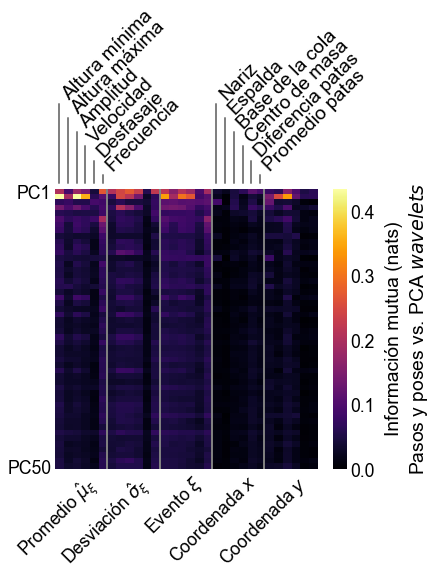

In [31]:
left, width_im = 0.0, 0.65
bottom, height_im = 0.0, 0.65
width_annot, height_annot = 0.52, 0.2
spacing = 0.005

rect_im = [left, bottom, width_im, height_im]
rect_annot = [left, bottom + height_im + spacing, width_annot, height_annot]

fig = plt.figure(figsize=(7, 6))

ax_im = fig.add_axes(rect_im, frameon=False)
ax_annot = fig.add_axes(rect_annot, frameon=False)

vmax = mi_pca_wav_scaler_stp.max()
im = ax_im.imshow(mi_pca_wav_scaler_stp[:, list(orden.keys())], aspect="auto", cmap=cmap, vmin=0, vmax=vmax)
cax = plt.colorbar(im, ax=ax_im)
cax.set_label(label="Información mutua (nats)\n" + r"Pasos y poses vs. PCA $wavelets$", labelpad=10)
cax.ax.set_frame_on(False)
cax.ax.tick_params(axis="both", which="both", length=0)
ax_im.set_xticks(np.arange(5, 30, 6))
ax_im.set_xticklabels(stp_nombres, rotation=45, ha="right")
pca_nombres = [
    "PC1",
    "PC50",
]
ax_im.set_yticks([0, 49])
ax_im.set_yticklabels(pca_nombres)
ax_im.vlines(6 * np.arange(1, 5) - 0.5, *ax_im.get_ylim(), colors="0.5", lw=2)
ax_im.set_frame_on(False)
ax_im.tick_params(axis="both", which="both", length=0)
for i, feature in enumerate(stp_feats):
    max_stem = 10
    factor_stem = 1.8
    ax_annot.plot([i, i], [0, max_stem - factor_stem * i], "0.5", lw=2)
    ax_annot.text(i, max_stem - factor_stem * i, feature, va="bottom", ha="left", rotation=45)
for i, marker in enumerate(stp_markers):
    max_stem = 10
    factor_stem = 1.8
    ax_annot.plot([18 + i, 18 + i], [0, max_stem - factor_stem * i], "0.5", lw=2)
    ax_annot.text(18 + i, max_stem - factor_stem * i, marker, va="bottom", ha="left", rotation=45)
ax_annot.set_xlim(*ax_im.get_xlim())
ax_annot.set_xticks([])
ax_annot.set_yticks([])
plt.savefig(config_dodo.FIG_PATH / "Mutual Information" / "mi_pca_wav_scaler_stp.pdf", bbox_inches="tight", dpi=600)
plt.savefig(config_dodo.FIG_PATH / "Mutual Information" / "mi_pca_wav_scaler_stp.png", bbox_inches="tight", dpi=600)
plt.show()
plt.close()